<img src="images/notebook11_header.png" width="1024" alt="Python for Geospatial Data Science" style="border-radius:10px"/>

**Dr Gunnar Mallon** (g.mallon@rug.nl), *Department of Cultural Geography (Faculty of Spatial Science)*, *University of Groningen*

---

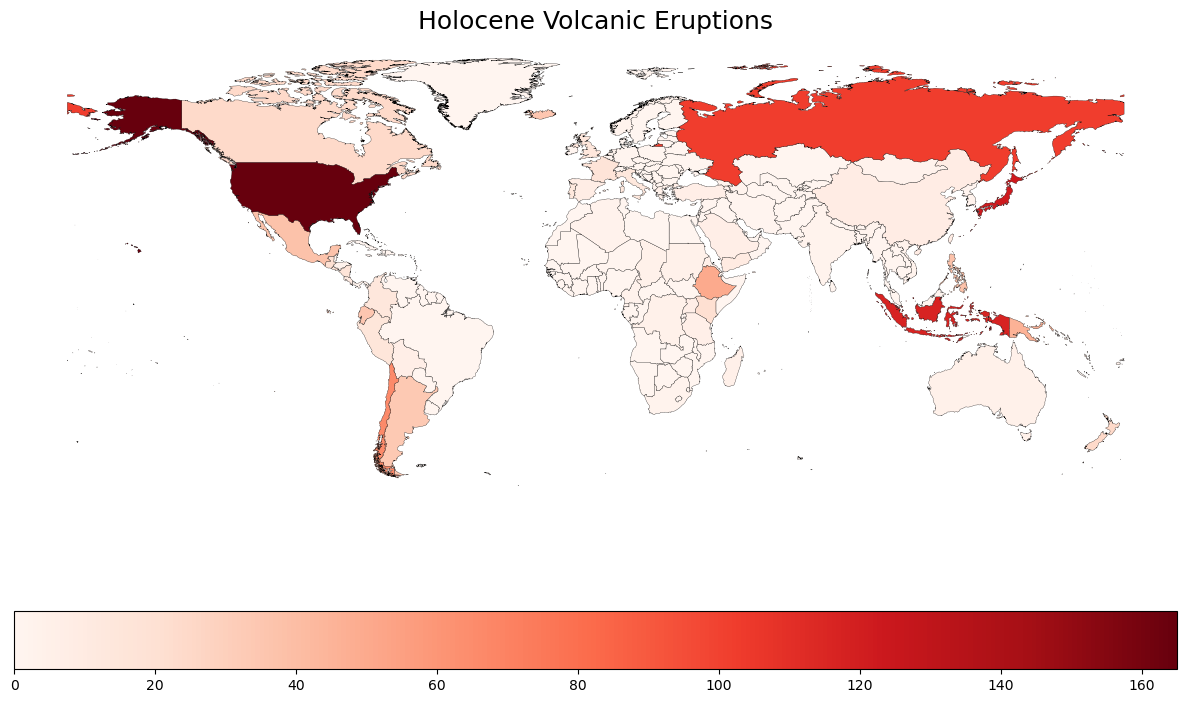

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'exercise_data/eruptions_count_emergency.csv'
shape_path = 'exercise_data/shapefiles/World_Countries_Generalized.shp'

# Read the csv file into the DataFrame
df = pd.read_csv(data_path)
df.columns=['ID', 'Country', 'Eruptions Count']

df['Eruptions Count'] = df['Eruptions Count'].astype(int)

shape_data = gpd.read_file(shape_path)
shape_data = shape_data.merge(df, left_on='COUNTRY', right_on='Country', how='left')
shape_data['Eruptions Count'].fillna(0, inplace=True)

exclude_territories = ['Antarctica'] # Add any other territories if needed
shape_data = shape_data[~shape_data['COUNTRY'].isin(exclude_territories)]

# Create the plot and store it in 'ax'
ax = shape_data.plot(
    column='Eruptions Count',
    legend=True,
    legend_kwds={
        #'label': "Holocene Volcanic Eruptions",
        'orientation': "horizontal",
        'format': "%0.0f"
    },
    figsize=(15, 9),
    cmap='Reds',
    edgecolor='black',
    linewidth=0.2
)

# Use Matplotlib to show the plot
ax.set_axis_off()
ax.set_title('Holocene Volcanic Eruptions', fontsize=18)
plt.show()

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'exercise_data/volcano_data/Smithsonian_VOTW_Holocene_Volcanoes.csv'
shape_path = 'exercise_data/shapefiles/World_Countries_Generalized.shp'

# Read the csv file into the DataFrame
df = pd.read_csv(data_path)

df = df.groupby('Country').size().reset_index(name='Eruptions Count')
df['Eruptions Count'] = df['Eruptions Count'].astype(int)

shape_data = gpd.read_file(shape_path)
#shape_data[shape_data['COUNTRY']=='Algeria']
print(list(shape_data['COUNTRY']))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Azores', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canarias', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos Islands', 'Colombia', 'Comoros', 'Congo', 'Congo DRC', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia'